In [1]:
from typing import List
import warnings

import numpy as np
import geopandas as gpd
import rasterio
import pandas as pd
from shapely.geometry import LineString, Point
from shapely.errors import ShapelyDeprecationWarning
import matplotlib.pyplot as plt
from scipy import ndimage

from scrollstats.config import DB_PW
from scrollstats import BendDataset, calculate_ridge_metrics, calc_dist

In [2]:
bend_id = "LBR_025"

# Get rasters
dem = rasterio.open("/Users/avan/FLUD/BrazosScrolls/data/raster/dem/sb_1_025_clip.tif")
bin_raster = rasterio.open("/Users/avan/FLUD/BrazosScrolls/data/r10/agreement-clip-denoise/sb_1_025_agreement_45px_binclass_clip_dn_Buff100m_SmFt500m_ET80p.tif")

# Get vectors
bend_ds = BendDataset(bend_id)
ridges = bend_ds.get_ridges(True)
transects = bend_ds.get_transects(True)

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ShapelyDeprecationWarning)
    rich_transects, itx = calculate_ridge_metrics(transects, bin_raster, dem, ridges)
    
rich_transects.head()

Started BDE
Started TDE for t_009
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_010
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_011
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_012
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_013
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_014
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_015
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_016
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started 

,transect_id,bend_id,cl_distance,length,num_coords,shoot_distance,search_distance,dev_from_90,geometry,r_000,...,r_021,r_022,r_023,dem_signal,bin_signal,clean_bin_signal,ridge_count_raster,fft_spacing,amp_signal,fft_amps
0,t_009,LBR_025,551.487241,521.697579,10,300,200,5,"LINESTRING (838955.420 4310869.288, 839071.179...",NaN,...,196.690242,NaN,446.144814,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7,234.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",261.0
1,t_010,LBR_025,619.698817,539.611592,10,300,200,5,"LINESTRING (838966.055 4310802.081, 839082.539...",NaN,...,223.913145,NaN,464.515721,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9,50.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",49.0
2,t_011,LBR_025,686.840844,562.203836,11,300,200,5,"LINESTRING (838991.210 4310739.971, 839077.313...",92.980005,...,255.027040,NaN,486.858447,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10,76.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",80.0
3,t_012,LBR_025,751.005958,569.387565,11,300,200,5,"LINESTRING (839026.585 4310686.543, 839094.098...",80.106317,...,267.531844,NaN,493.620972,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10,86.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",569.0
4,t_013,LBR_025,813.920130,585.131969,11,300,200,5,"LINESTRING (839069.628 4310640.755, 839090.739...",98.064331,...,282.161356,NaN,509.681470,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10,59.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",584.0


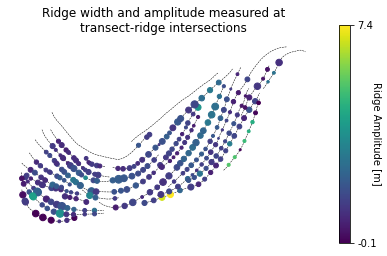

In [4]:
fig, ax = plt.subplots(1,1, figsize=(7,4))

itx.plot(ax=ax, column="ridge_amp", markersize="ridge_width", legend=True)
ridges.plot(ax=ax, color="k", ls="--", lw=0.5, zorder=0)

cbar = fig.axes[1]
min_max = itx["ridge_amp"].quantile([0,1])
cbar.set_yticks(min_max, labels = np.round(min_max, 1))

cbar.set_ylabel("Ridge Amplitude [m]", rotation=270)

ax.set_title("Ridge width and amplitude measured at\ntransect-ridge intersections")
ax.set_axis_off()
# plt.savefig("/Users/avan/FLUD/BrazosScrolls/figures/WidthAndAmpAtItx_newmethod.png", dpi=300)

/Users/avan/opt/miniconda3/envs/scroll/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'log(Amplitude [m])')

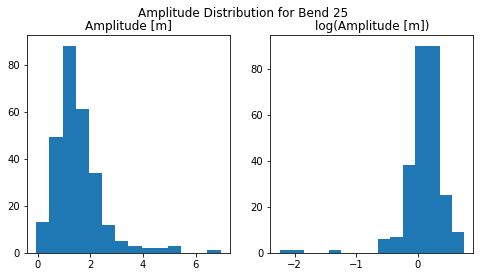

In [6]:

itx["amp_log"] = np.log10(itx["ridge_amp"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(itx["ridge_amp"], bins=np.arange(itx.ridge_amp.min(), itx.ridge_amp.max(), 0.5))
ax2.hist(itx["amp_log"], bins=np.arange(itx.amp_log.min(), itx.amp_log.max(), 0.2))
plt.suptitle("Amplitude Distribution for Bend 25")
ax1.set_title("Amplitude [m]")
ax2.set_title("log(Amplitude [m])")
# plt.savefig("/Users/avan/FLUD/BrazosScrolls/figures/WidthAndAmpAtItx_newmethod_logamp_hist.png", dpi=300)

In [7]:
itx[itx.ridge_amp >=4.5].reset_index()

,bend_id,transect_id,ridge_id,start_distances,relative_vertex_distances,vertex_indices,dem_signal,bin_signal,pre_mig_dist,post_mig_dist,pre_mig_time,post_mig_time,pre_mig_rate,post_mig_rate,ridge_width,ridge_amp,deposit_year,substring_geometry,geometry,amp_log
0,LBR_025,t_028,r_010,0.0,"[0.0, 0.20878377105593357, 0.25484146606971875]","[0, 90, 110]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",19.767769,89.609118,NaN,NaN,NaN,NaN,33.0,6.902348,NaN,"LINESTRING (839969.456 4310672.565, 839944.462...",POINT (839944.462 4310758.617),0.838997
1,LBR_025,t_029,r_010,0.0,"[0.0, 0.20373616189893248, 0.24966656692251687]","[0, 92, 113]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",20.775654,92.155776,NaN,NaN,NaN,NaN,37.0,7.427795,NaN,"LINESTRING (840028.455 4310690.409, 839996.708...",POINT (839996.708 4310776.924),0.870860
2,LBR_025,t_036,r_011,0.0,"[0.0, 0.09504564510868295, 0.2039725609979816]","[0, 54, 116]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",61.743132,53.874800,NaN,NaN,NaN,NaN,9.0,5.410004,NaN,"LINESTRING (840400.145 4310926.433, 840359.786...",POINT (840359.786 4310962.121),0.733198
3,LBR_025,t_037,r_011,0.0,"[0.0, 0.10132870872144056, 0.2236512468094653]","[0, 57, 126]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",68.834097,57.020319,NaN,NaN,NaN,NaN,9.0,5.300575,NaN,"LINESTRING (840442.407 4310974.501, 840397.694...",POINT (840397.694 4311009.885),0.724323
4,LBR_025,t_039,r_011,0.0,"[0.0, 0.10405007880770019, 0.2386824962717768]","[0, 55, 126]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",70.967029,54.846560,NaN,NaN,NaN,NaN,9.0,5.018898,NaN,"LINESTRING (840508.180 4311087.800, 840458.357...",POINT (840458.357 4311110.730),0.700608
5,LBR_025,t_040,r_011,0.0,"[0.0, 0.11422348264464424, 0.24464558233690112]","[0, 57, 122]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",65.176760,57.081711,NaN,NaN,NaN,NaN,8.0,4.652607,NaN,"LINESTRING (840536.769 4311147.647, 840484.778...",POINT (840484.778 4311171.212),0.667696
6,LBR_025,t_041,r_011,0.0,"[0.0, 0.1252956405358685, 0.24863187083457922]","[0, 59, 117]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",58.056881,58.979216,NaN,NaN,NaN,NaN,11.0,4.564426,NaN,"LINESTRING (840562.927 4311206.208, 840508.281...",POINT (840508.281 4311228.397),0.659386


In [8]:
sus_transects = itx[itx.ridge_amp >=4.5].reset_index()[["transect_id", "ridge_amp"]]
sus_transect_ids = sus_transects.loc[:, "transect_id"]
sus_transects


,transect_id,ridge_amp
0,t_028,6.902348
1,t_029,7.427795
2,t_036,5.410004
3,t_037,5.300575
4,t_039,5.018898
5,t_040,4.652607
6,t_041,4.564426


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


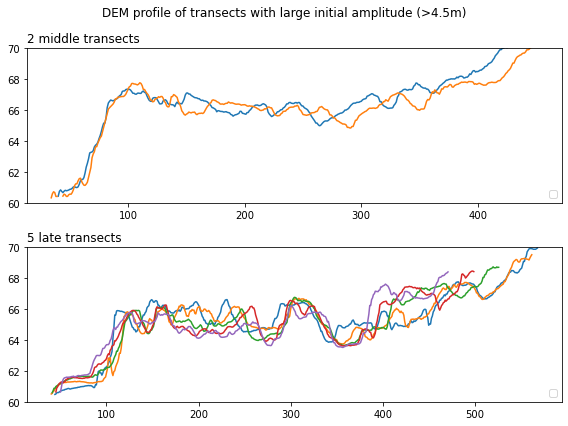

In [9]:
# sus_transects = itx[itx.amplitude >=4.5].reset_index()[["transect_id", "amplitude"]]
sus_signals = rich_transects.set_index("transect_id").loc[sus_transect_ids][["dem_signal"]]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

for i, row in sus_signals.iterrows():

    # a = sus_transects.set_index("transect_id").loc[i][0]

    if i in ["t_028", "t_029"]:
        ax1.plot(row["dem_signal"]) #, label=f"{i} ({round(a, 1)}m)")
    else:
        ax2.plot(row["dem_signal"]) #, label=f"{i}: ({round(a, 1)}m)")

for ax in fig.axes:
    ax.legend(loc="lower right")
    ax.set_ylim([60, 70])

plt.suptitle("DEM profile of transects with large initial amplitude (>4.5m)")
ax1.set_title("2 middle transects", loc="left")
ax2.set_title("5 late transects", loc="left")
fig.tight_layout()
# plt.savefig("/Users/avan/FLUD/BrazosScrolls/figures/ProfilesWithHighInitialAmplitude.png", dpi=300)